The goal here is to plot out `rotSkyPos`, `rotTelPos`, `parA` (parallactic angle) distributions for all the new dbs. The data is already saved by running `bash_save_rot_data.sh`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

**Set up**

In [3]:
data_path = '/global/cscratch1/sd/awan/lsst_output/post_wp_output/rot_output/'
outdir = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/results/'

**Get the data**

In [4]:
%%time
# get all the files
data_files = [f for f in os.listdir(data_path) if f.endswith('csv')]

# now read in the data
simdatas = {}
for i, file in enumerate(data_files): # loop over all the db files
    print(file)
    db = file.split('_data.csv')[0]
    simdatas[db] = pd.read_csv('%s/%s'%(data_path, file))
print('\n## Read in data for %s dbs'%(i))

weather_1.10c_10yrs_data.csv
weather_0.80c_10yrs_data.csv
very_alt2_rm5illum40_10yrs_data.csv
too_pairsmix_rate1_10yrs_data.csv
very_alt3_rm5illum15_10yrs_data.csv
templates_w_5.0_1exp_pairsmix_10yrs_data.csv
presto_third_10yrs_data.csv
bluer_footprint10yrs_data.csv
too_pairsmix_rate100_10yrs_data.csv
stuck_rolling10yrs_data.csv
baseline_2exp_pairsame_10yrs_data.csv
baseline_1exp_pairsmix_10yrs_data.csv
very_alt3_rm5illum50_10yrs_data.csv
newB10yrs_data.csv
simple_roll_mod10_sdf0.20mixed_10yrs_data.csv
fc1exp_pairsmix_ilim15_10yrs_data.csv
weather_0.20c_10yrs_data.csv
baseline10yrs_data.csv
baseline_2exp_pairsmix_10yrs_data.csv
rotator_1exp_pairsmix_10yrs_data.csv
ddf_0.23deg_1exp_pairsmix_10yrs_data.csv
very_alt3_rm5illum20_10yrs_data.csv
roll_mod6_sdf0.05mixed_10yrs_data.csv
fc1exp_pairsmix_ilim60_10yrs_data.csv
dec_1exp_pairsmix_10yrs_data.csv
roll_mod6_sdf0.20mixed_10yrs_data.csv
stability_180offset_42seed10yrs_data.csv
stability_1offset_42seed10yrs_data.csv
very_alt2_rm5illum15_10

**Look at the ranges of the rot angles**

**Set up to plot things**

In [5]:
# want specific ordering of the dbs so write them out
dbs = simdatas.keys()
#dbs

In [6]:
ndbs = len(dbs)

from matplotlib import cm
colors = [cm.viridis(i) for i in np.arange(0, 255, int(255/ndbs))]

if len(colors)<ndbs: raise ValueError('Not enough colors.')

**Figure out the min, maxs on the arrays**

In [7]:
mins = {'tel': 100, 'dithtel': 100, 'sky': 100, 'parA': 1000}
maxs = {'tel': -100, 'dithtel': -100, 'sky': -100, 'parA': -100}
for db in dbs:
    # look at the min, max
    mins['tel'] = min(mins['tel'], min(simdatas[db]['rotTelPos']))
    maxs['tel'] = max(maxs['tel'], max(simdatas[db]['rotTelPos']))
    
    mins['sky'] = min(mins['sky'], min(simdatas[db]['rotSkyPos']))
    maxs['sky'] = max(maxs['sky'], max(simdatas[db]['rotSkyPos']))
    
    mins['parA'] = min(maxs['parA'], min(simdatas[db]['PA']))
    maxs['parA'] = max(maxs['parA'], max(simdatas[db]['PA']))

    
print('mins: %s\nmaxs: %s'%(mins, maxs))

mins: {'tel': -92.06362847635825, 'dithtel': 100, 'sky': 0.0, 'parA': -179.99985102701527}
maxs: {'tel': 91.28044043250212, 'dithtel': -100, 'sky': 359.99999232702936, 'parA': 179.99999512567211}


Okay dithered rotSkyPos range is not the same as undithered one. Wrap the dithered values.

**Plot distributions (with rotSkyPos wrapped to be in 0-180 deg)**

In [8]:
bins_telpos = np.arange(-92, 92, 0.5)
bins_skypos = np.arange(-2, 182, 0.5)
bins_pa = np.arange(-182, 182, 0.5)

Saved compare_rot_angles_newdbs_84dbs.png


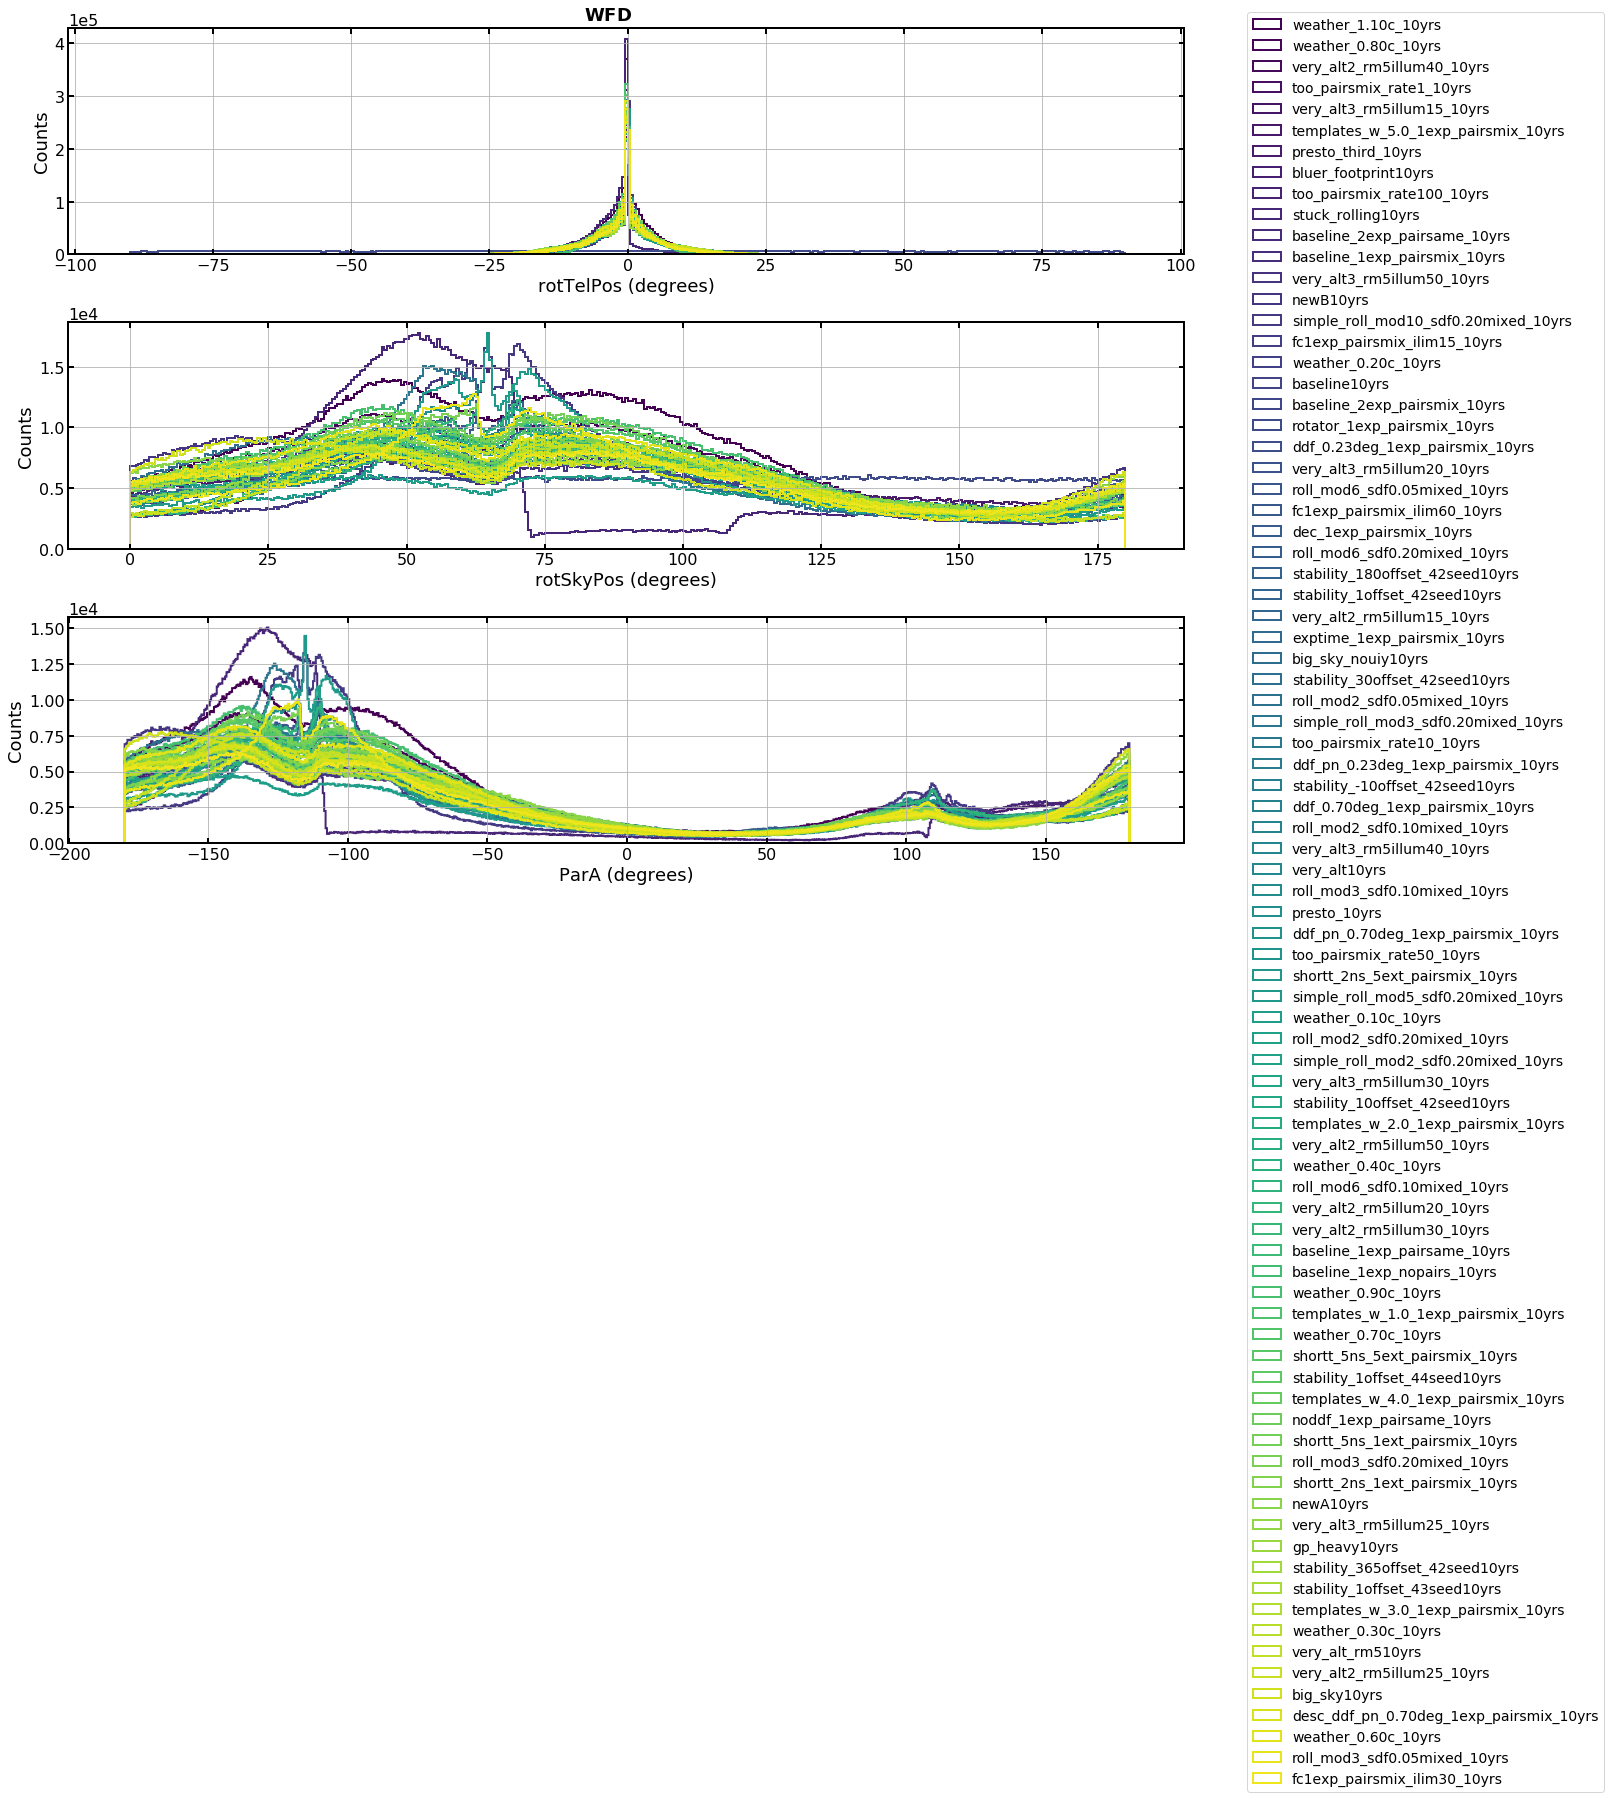

In [9]:
# histograms of the angles
nrows, ncols = 3, 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

for i, db in enumerate(dbs):
    if db in simdatas:
        # undithered rotTelPos
        axes[0].hist(simdatas[db]['rotTelPos'], bins=bins_telpos,
                     color=colors[i], histtype='step', lw=2)
        # undithered rotSkyPos
        axes[1].hist(simdatas[db]['rotSkyPos'] % 180, label=db,
                     bins=bins_skypos, color=colors[i], histtype='step', lw=2)
        # parallactic angle
        axes[2].hist(simdatas[db]['PA'],
                     bins=bins_pa, color=colors[i], histtype='step', lw=2)
# plot details
#ymax_tel, ymax_sky = 10 ** 5, 1.2 * 10 ** 4
for row in range(nrows):
    axes[row].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[row].set_ylabel('Counts')
    
#axes[0].set_ylim(0, ymax_tel)
#axes[1].set_ylim(0, ymax_sky)

axes[0].set_xlabel('rotTelPos (degrees)')
axes[1].set_xlabel('rotSkyPos (degrees)')
axes[2].set_xlabel('ParA (degrees)')

axes[1].legend(bbox_to_anchor=(1.05, 2.4))

plt.suptitle(r'$\bf{WFD}$', fontsize=fontsize, y=0.9 )
fig.set_size_inches(20, 15)

filename = 'compare_rot_angles_newdbs_%sdbs.png'%(i+1)
plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)

plt.show()

**Now plot color coded by the overall groups**

In [10]:
colors_cm = ['indianred', 'mediumslateblue', 'olive', 'orangered', 'black',
             'turquoise', 'brown', 'goldenrod', 'dodgerblue', 'darkorchid', 'y', 'palevioletred', 'teal', 'sandybrown']

In [11]:
# access the dictionary mapping the overall categories to the db files.
import sys
sys.path.append('/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/runscripts/')
from helper import folder_map

Saved compare_rot_angles_newdbs_14dbs_grouped.png


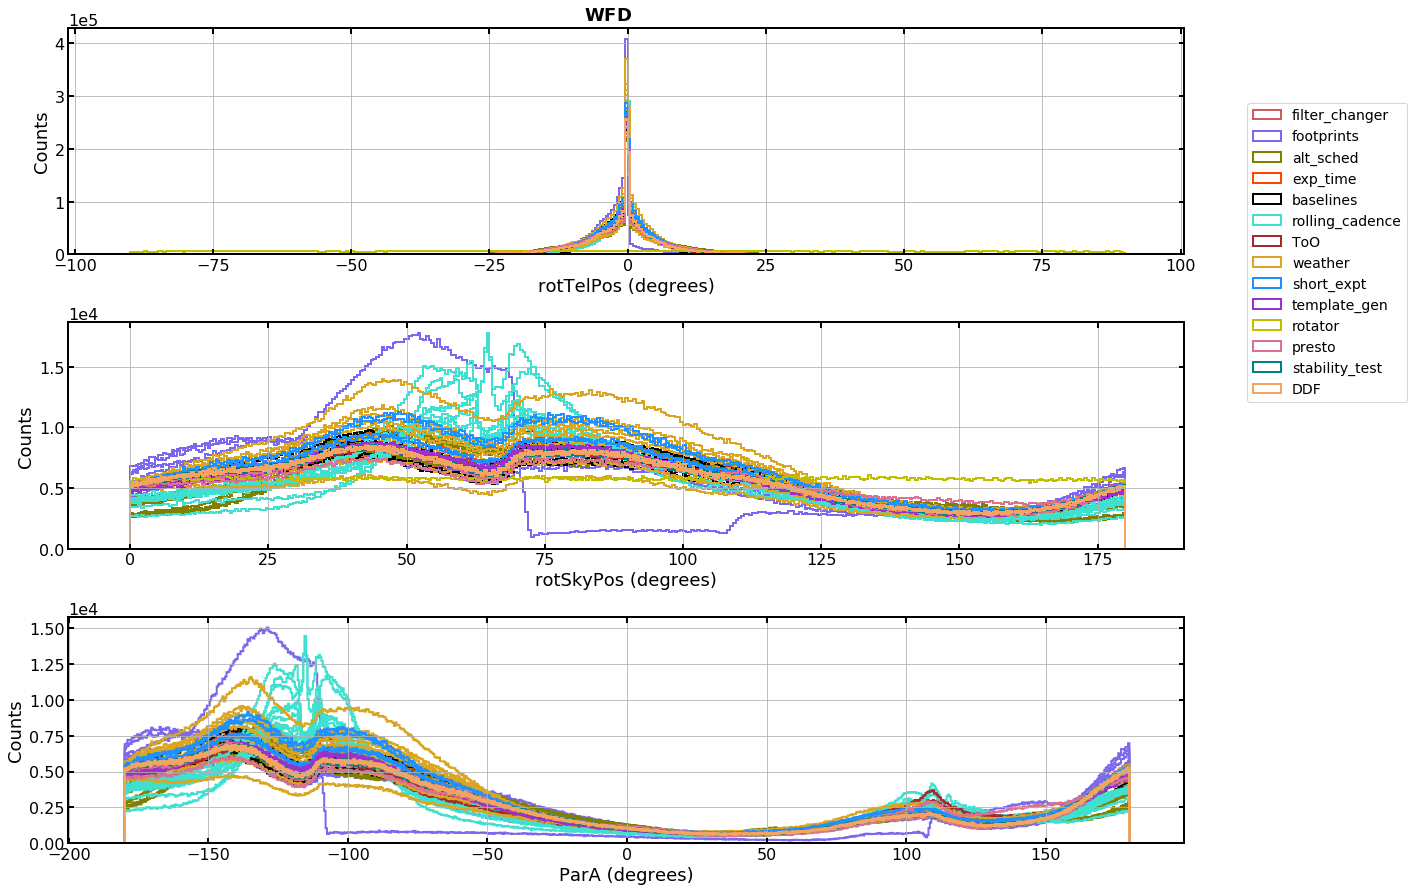

In [12]:
# histograms of the angles
nrows, ncols = 3, 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

for i, grp in enumerate( folder_map ):
    for j, db in enumerate( folder_map[grp] ):
        if db in simdatas:
            # undithered rotTelPos
            axes[0].hist(simdatas[db]['rotTelPos'], bins=bins_telpos,
                         color=colors_cm[i], histtype='step', lw=2)
            # undithered rotSkyPos
            if j == 0:
                axes[1].hist(simdatas[db]['rotSkyPos'] % 180, label=grp,
                         bins=bins_skypos, color=colors_cm[i], histtype='step', lw=2)
            else:
                axes[1].hist(simdatas[db]['rotSkyPos'] % 180, label=None,
                         bins=bins_skypos, color=colors_cm[i], histtype='step', lw=2)
            # parallactic angle
            axes[2].hist(simdatas[db]['PA'],
                         bins=bins_pa, color=colors_cm[i], histtype='step', lw=2)
# plot details
#ymax_tel, ymax_sky = 10 ** 5, 1.2 * 10 ** 4
for row in range(nrows):
    axes[row].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[row].set_ylabel('Counts')
    
#axes[0].set_ylim(0, ymax_tel)
#axes[1].set_ylim(0, ymax_sky)

axes[0].set_xlabel('rotTelPos (degrees)')
axes[1].set_xlabel('rotSkyPos (degrees)')
axes[2].set_xlabel('ParA (degrees)')

axes[1].legend(bbox_to_anchor=(1.05, 2))

plt.suptitle(r'$\bf{WFD}$', fontsize=fontsize, y=0.9 )
fig.set_size_inches(20, 15)

filename = 'compare_rot_angles_newdbs_%sdbs_grouped.png'%(i+1)
plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)

plt.show()